In [2]:
# Step 1: Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import shap
import warnings
warnings.filterwarnings("ignore")



# Loading the dataset

In [7]:

# Step 2: Load the dataset
df = pd.read_csv('/kaggle/input/creditcardcsv/creditcard.csv')

# Cleaning dataset

In [8]:
rows, columns = df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

Number of rows: 284807
Number of columns: 31


In [9]:
# Check basic info
df.info()

# Describe dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
# Check class distribution
print("Class Distribution:")
print(df['Class'].value_counts())

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


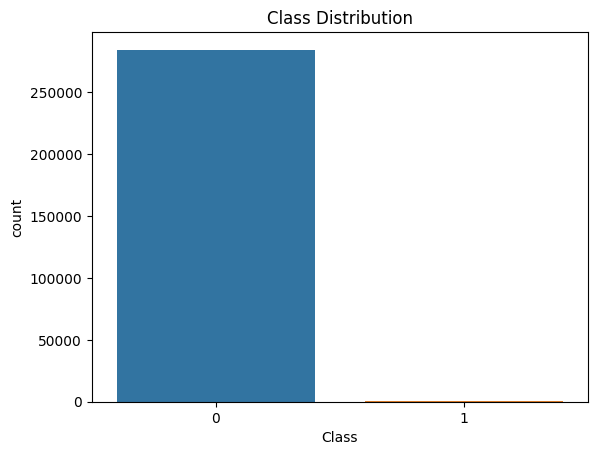

In [11]:
# Plot class distribution
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()

In [12]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [13]:
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [14]:
# The dataset mostly consists of PCA-transformed features V1-V28 and 'Amount' and 'Time' which may need scaling.
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled['Amount'] = scaler.fit_transform(X_scaled[['Amount']])
X_scaled['Time'] = scaler.fit_transform(X_scaled[['Time']])


In [15]:
X_scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249


In [16]:
# Imbalance handling:
#SMOTE
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_scaled, y)

In [17]:
print("New Class Distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

New Class Distribution after SMOTE:
Class
0    284315
1    284315
Name: count, dtype: int64


## Supervised Learning

In [18]:
# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y_resampled)

# Baseline Model - Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56863
           1       0.97      0.92      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



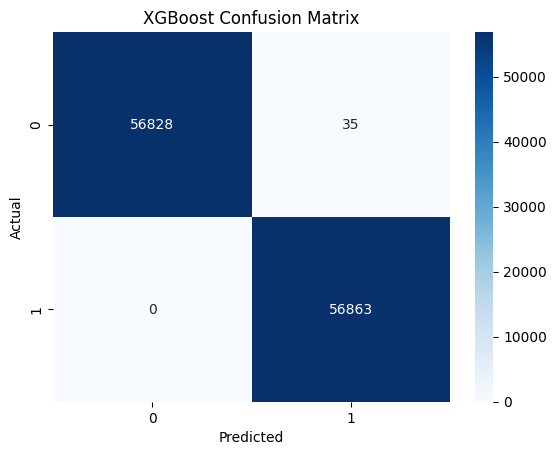

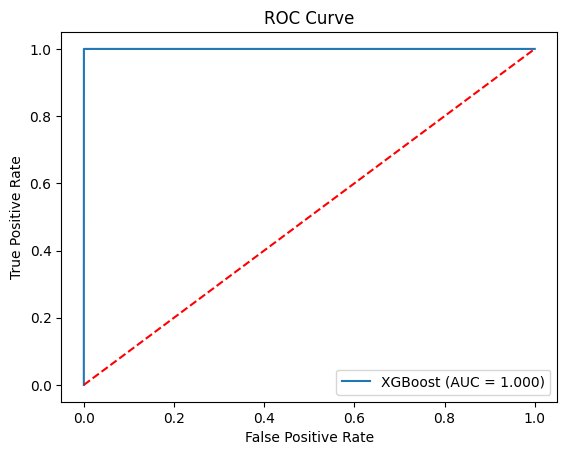

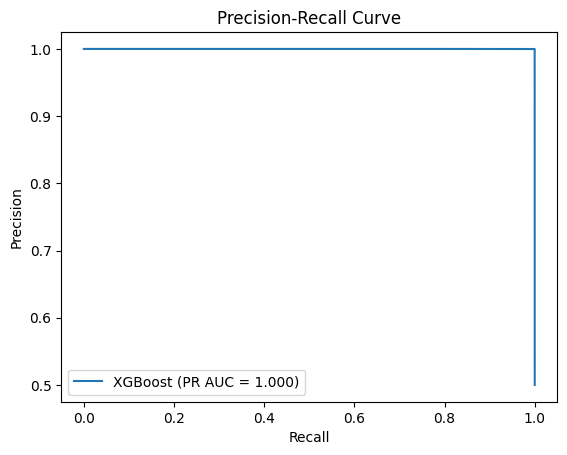

In [19]:
# XGBoost model training
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Compute ROC curve and AUC for XGBoost
fpr, tpr, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='XGBoost (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# PR Curve
precision, recall, _ = precision_recall_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)

plt.plot(recall, precision, label='XGBoost (PR AUC = %0.3f)' % pr_auc)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


Without rounding off

In [20]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy)


XGBoost Accuracy: 0.9996922427589118


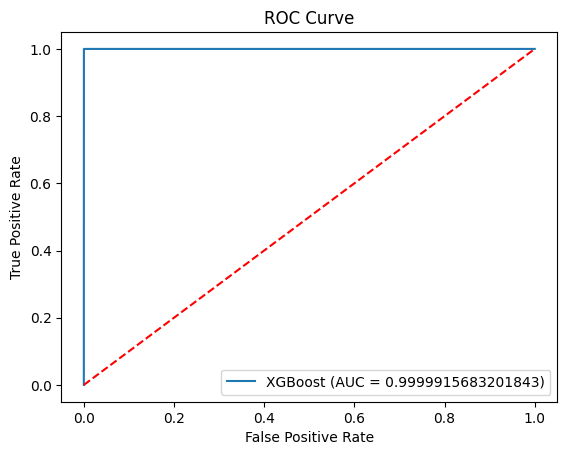

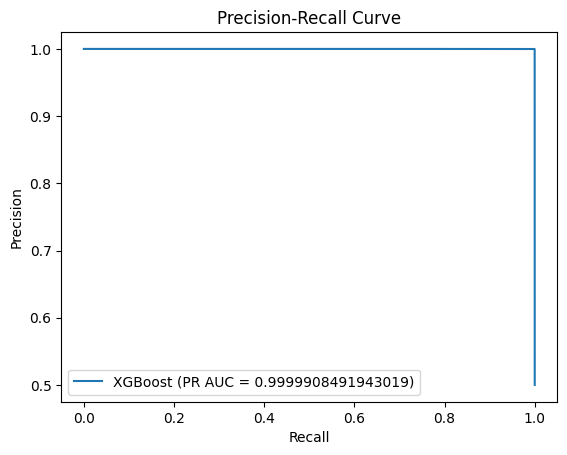

In [21]:
# ROC Curve
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# PR Curve
plt.plot(recall, precision, label=f'XGBoost (PR AUC = {pr_auc})')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


Hyperparamter Tuning

In [23]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Define the parameter distribution
param_dist = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_distributions=param_dist,
    n_iter=10,  
    scoring='accuracy',  
    n_jobs=-1,
    cv=3,  # Using 3-fold cross-validation
    verbose=3,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)

# Predict using the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print the classification report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best score found:  0.9989887976122526
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [24]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy)


XGBoost Accuracy: 0.9996922427589118


Feature importance and SHAP

In [ ]:
shap.initjs()

Feature Importance:
   feature  importance
14     V14    0.609935
4       V4    0.054818
8       V8    0.030242
12     V12    0.024804
10     V10    0.017523
17     V17    0.017423
13     V13    0.017310
29  Amount    0.016369
0     Time    0.012689
19     V19    0.012618
3       V3    0.012129
1       V1    0.011722
2       V2    0.011422
11     V11    0.011269
21     V21    0.011176
22     V22    0.011157
25     V25    0.010313
5       V5    0.010086
18     V18    0.009895
7       V7    0.009787
23     V23    0.009234
9       V9    0.009116
15     V15    0.008789
20     V20    0.008445
28     V28    0.008207
16     V16    0.007779
27     V27    0.007732
26     V26    0.007533
6       V6    0.005607
24     V24    0.004871


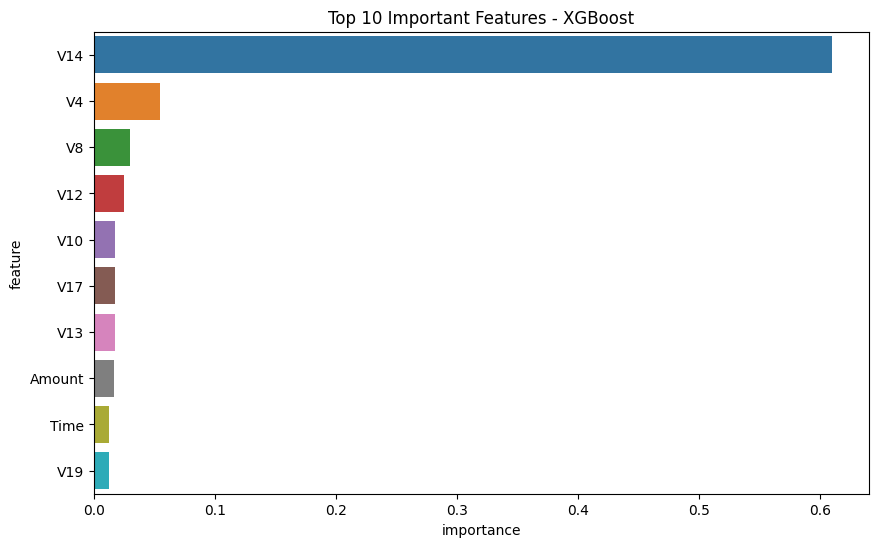

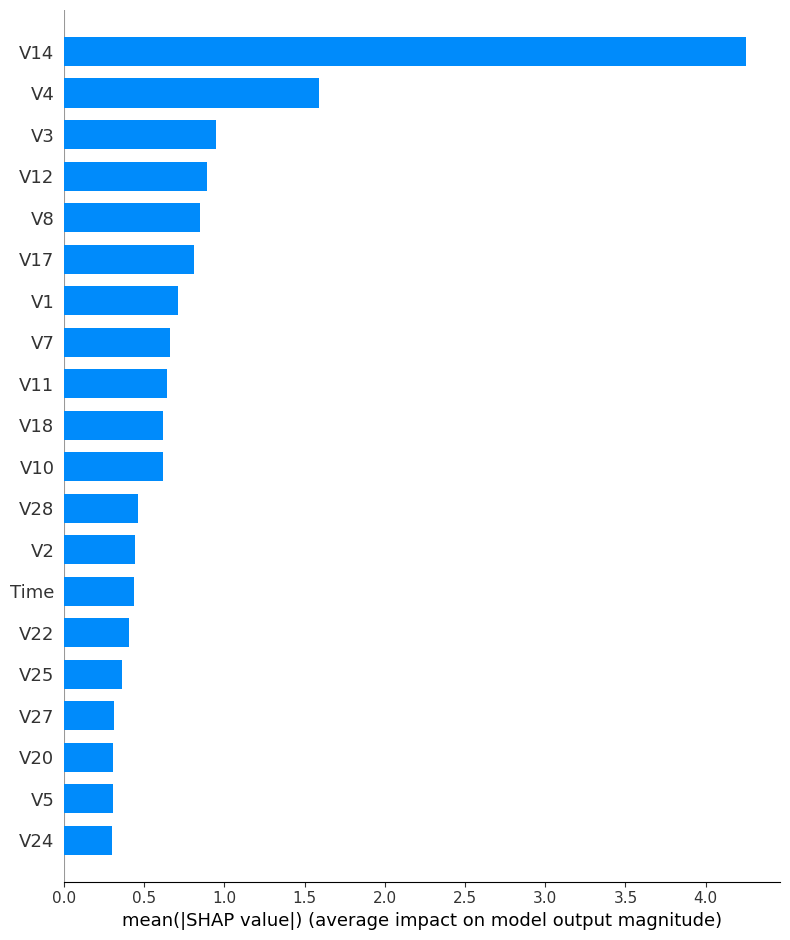

In [22]:
# Feature Importance from XGBoost
feature_importances = xgb_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)
print("Feature Importance:")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=importance_df.head(10))
plt.title("Top 10 Important Features - XGBoost")
plt.show()

# SHAP Explanation
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Summary plot for feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Explanation for a single prediction
index_to_explain = 0  # example index
shap.force_plot(explainer.expected_value, shap_values[index_to_explain,:], X_test.iloc[index_to_explain,:])


## Unsupervised Learning

In [23]:
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Scale Time and Amount features
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled['Amount'] = scaler.fit_transform(X_scaled[['Amount']])
X_scaled['Time'] = scaler.fit_transform(X_scaled[['Time']])

# -----------------------------------------------------------
# Isolation Forest Unsupervised Approach
# -----------------------------------------------------------
print("=== Isolation Forest Approach ===")

=== Isolation Forest Approach ===


In [24]:
# Train Isolation Forest
iso_model = IsolationForest(contamination=0.001, random_state=42)
iso_model.fit(X_scaled)

# Predict anomalies
iso_preds = iso_model.predict(X_scaled)
# Convert predictions: -1 means anomaly
iso_anomalies = np.where(iso_preds == -1, 1, 0)

print("Isolation Forest Classification Report (Compared to True Labels):")
print(classification_report(y, iso_anomalies))

Isolation Forest Classification Report (Compared to True Labels):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.29      0.17      0.21       492

    accuracy                           1.00    284807
   macro avg       0.64      0.58      0.61    284807
weighted avg       1.00      1.00      1.00    284807



In [25]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, iso_anomalies)
print("Isolation Forest Accuracy:", accuracy)


Isolation Forest Accuracy: 0.9978546875603479


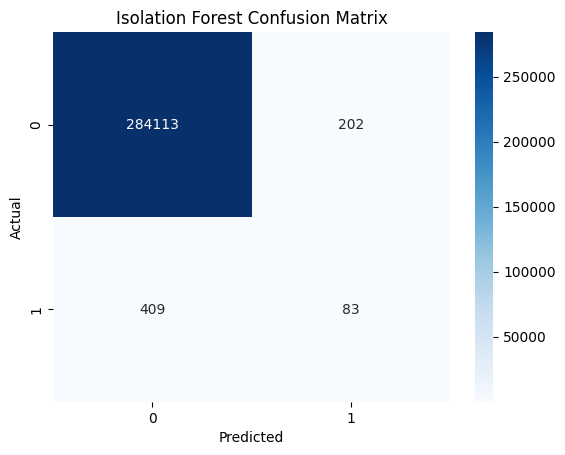

In [26]:
cm_iso = confusion_matrix(y, iso_anomalies)
sns.heatmap(cm_iso, annot=True, fmt='d', cmap='Blues')
plt.title("Isolation Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

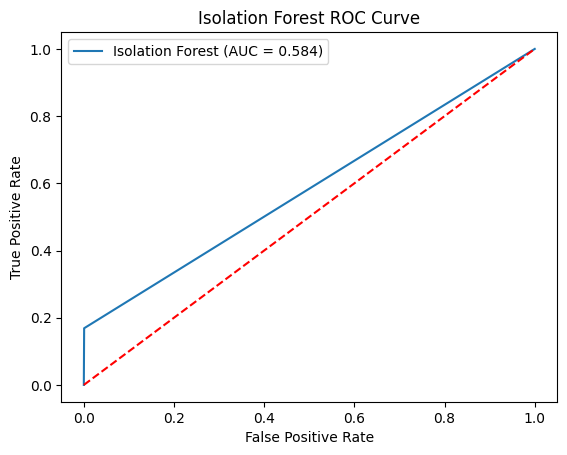

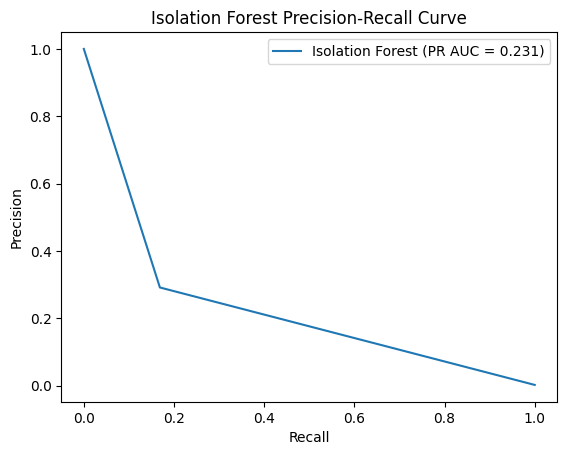

In [27]:
# Evaluate using ROC Curve for Isolation Forest
fpr, tpr, _ = roc_curve(y, iso_anomalies)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='Isolation Forest (AUC = %0.3f)' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.title("Isolation Forest ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

precision, recall, _ = precision_recall_curve(y, iso_anomalies)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label='Isolation Forest (PR AUC = %0.3f)' % pr_auc)
plt.title("Isolation Forest Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [28]:
# -----------------------------------------------------------
# Autoencoder Unsupervised Approach
# The idea:
# 1. Train the Autoencoder on normal transactions only (Class = 0).
# 2. The Autoencoder learns normal patterns and tries to reconstruct them.
# 3. Fraudulent transactions are likely to have higher reconstruction error.
# -----------------------------------------------------------
print("=== Autoencoder Approach ===")

=== Autoencoder Approach ===


In [29]:
# Split into normal and fraud
X_normal = X_scaled[y == 0]
X_fraud = X_scaled[y == 1]

# Convert to NumPy arrays
X_normal = X_normal.values
X_fraud = X_fraud.values
X_all = X_scaled.values

# Training/Validation split for normal data
X_train = X_normal[:int(0.8*len(X_normal))]
X_val = X_normal[int(0.8*len(X_normal)):]

input_dim = X_train.shape[1]

In [31]:
from tensorflow.keras import layers, models
# Build Autoencoder model
autoencoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(input_dim, activation='linear')
])

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,286 (5.02 KB)

 Trainable params: 1,286 (5.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8563 - val_loss: 0.4844
Epoch 2/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4207 - val_loss: 0.4054
Epoch 3/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3614 - val_loss: 0.3787
Epoch 4/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3345 - val_loss: 0.3673
Epoch 5/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3236 - val_loss: 0.3608
Epoch 6/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3206 - val_loss: 0.3620
Epoch 7/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3140 - val_loss: 0.3483
Epoch 8/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3081 - val_loss: 0.3413
Epoch 9/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3026 - val_loss: 0.3309
Epoch 10/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2959 - val_loss: 0.3279


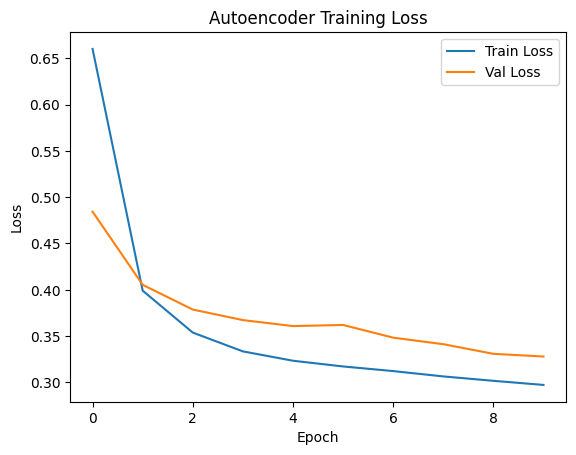

In [32]:
# Train the Autoencoder on normal transactions only
history = autoencoder.fit(X_train, X_train,
                          epochs=10,
                          batch_size=256,
                          validation_data=(X_val, X_val),
                          verbose=1)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Autoencoder Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [33]:
# Compute reconstruction errors for the entire dataset
X_recon = autoencoder.predict(X_all)
reconstruction_errors = np.mean(np.power(X_all - X_recon, 2), axis=1)
 

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


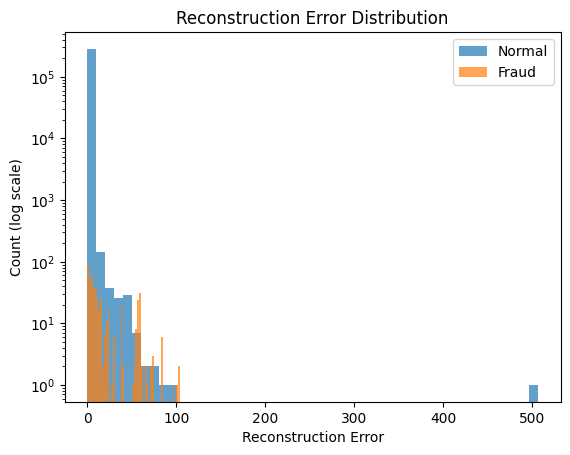

In [34]:
# Inspecting distribution of reconstruction errors
plt.hist(reconstruction_errors[y==0], bins=50, alpha=0.7, label='Normal')
plt.hist(reconstruction_errors[y==1], bins=50, alpha=0.7, label='Fraud')
plt.yscale('log')
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Count (log scale)")
plt.legend()
plt.show()

In [35]:
# Determining a threshold for anomalies
# Choose a threshold based on a percentile of errors on the normal set.
threshold = np.percentile(reconstruction_errors[y==0], 99.5)  # for example, 99.5th percentile
print("Chosen Threshold for Anomaly:", threshold)

Chosen Threshold for Anomaly: 2.2645392827927227


In [36]:
#errors greater than threshold will be considered as anomaly
autoencoder_anomalies = (reconstruction_errors > threshold).astype(int)

print("Autoencoder Classification Report (Compared to True Labels):")
print(classification_report(y, autoencoder_anomalies))

Autoencoder Classification Report (Compared to True Labels):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.22      0.82      0.35       492

    accuracy                           0.99    284807
   macro avg       0.61      0.91      0.67    284807
weighted avg       1.00      0.99      1.00    284807



In [40]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, autoencoder_anomalies)
print("Autoencoder Accuracy:", accuracy)


Autoencoder Accuracy: 0.994698164019845


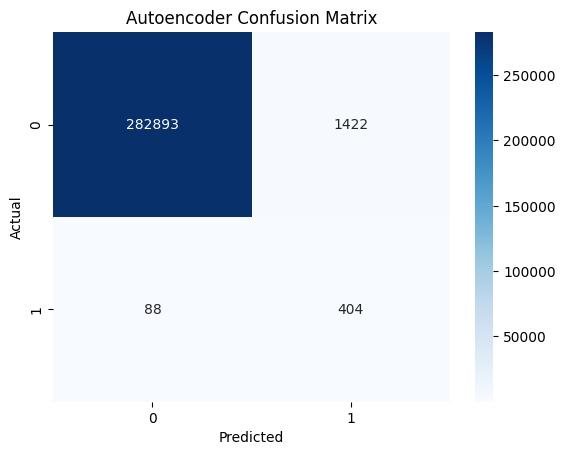

In [37]:
cm_ae = confusion_matrix(y, autoencoder_anomalies)
sns.heatmap(cm_ae, annot=True, fmt='d', cmap='Blues')
plt.title("Autoencoder Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

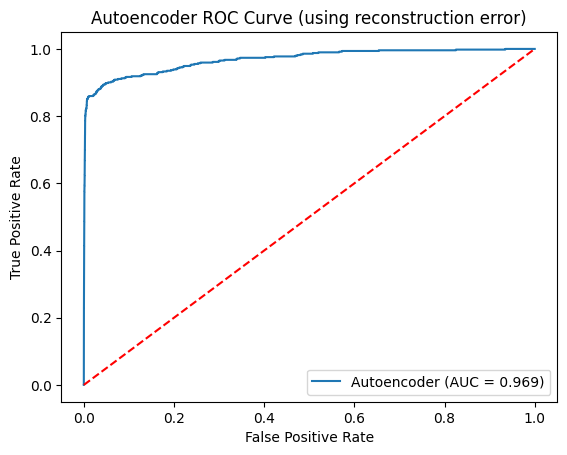

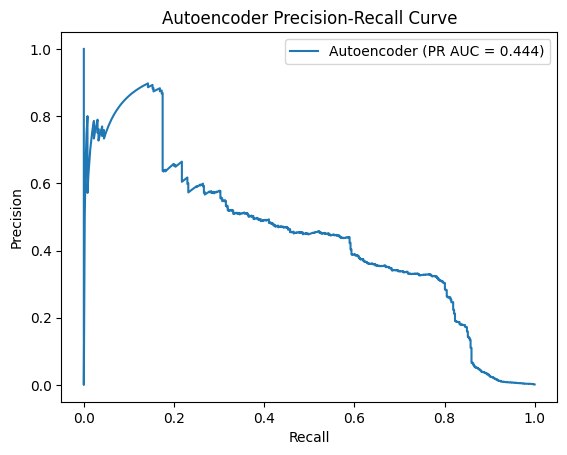

In [38]:
# Evaluate ROC and PR for Autoencoder
fpr, tpr, _ = roc_curve(y, reconstruction_errors)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='Autoencoder (AUC = %0.3f)' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.title("Autoencoder ROC Curve (using reconstruction error)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

precision, recall, _ = precision_recall_curve(y, reconstruction_errors)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label='Autoencoder (PR AUC = %0.3f)' % pr_auc)
plt.title("Autoencoder Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

# Insights and Comparison

**Insights:**
- Isolation Forest relies on a tree-based approach to isolate outliers. It was easy to implement, but results depend on the contamination parameter.
- The Autoencoder learns normal patterns and uses reconstruction error as an anomaly score. Adjusting the threshold is critical.
- By inspecting the distribution of reconstruction errors, we can see that fraudulent transactions often have higher errors, making it possible to distinguish them.
- Both methods show that purely unsupervised methods can detect a portion of anomalies without labeled training, but fine-tuning parameters (contamination for Isolation Forest, architecture and threshold for Autoencoder) is essential.
- The Autoencoder approach provides a flexible way to incorporate deep learning models, potentially improving detection with more tuning and deeper architectures.
